## Load Data

In [1]:
import pandas as pd
import numpy as np

original_data = pd.read_excel('2017임산물생산조사.xlsx')
original_data.head(3)

,시도/청,시군구/관리소,임가번호,구분(재배/채취),구분(재배/채취).1,구분(재배/채취).2,Unnamed: 6,구분(재배/채취).3,품목,품목.1,품목.2,품목.3,최종값,Unnamed: 13,Unnamed: 14,비고,점검사항,등록자,최초등록일,최종수정일
0,NaN,NaN,NaN,재배채취,재배기준,재배면적,환산면적,재배단위,대분류,중분류,소분류,품목단위,생산량,단가,생산액,NaN,NaN,NaN,NaN,NaN
1,서울특별시,종로구,341235.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,36920,3000,110760000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24
2,서울특별시,중구,341243.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,22720,3000,68160000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24


In [2]:
data = original_data.iloc[1:, [0, 3, 4, 5, 6, 8, 9, 10, 12]]
data.rename(columns={'구분(재배/채취)' : '재배채취',
                     '구분(재배/채취).1' : '재배기준',
                     '구분(재배/채취).2' : '재배면적',
                     'Unnamed: 6' : '환산면적',
                     '품목' : '품목 대분류',
                     '품목.1' : '품목 중분류',
                     '품목.2' : '품목 소분류',
                     '최종값' : '생산량'},
            inplace = True)
data

,시도/청,재배채취,재배기준,재배면적,환산면적,품목 대분류,품목 중분류,품목 소분류,생산량
1,서울특별시,채취,NaN,0,0,수실,재배수실,은행,36920
2,서울특별시,채취,NaN,0,0,수실,재배수실,은행,22720
3,서울특별시,채취,NaN,0,0,수실,재배수실,은행,41440
4,서울특별시,채취,NaN,0,0,수실,재배수실,은행,9960
5,서울특별시,채취,NaN,0,0,수실,재배수실,은행,12800
...,...,...,...,...,...,...,...,...,...
106875,경상북도,채취,NaN,NaN,0,수액,수액,고로쇠,3600
106876,경상북도,채취,NaN,NaN,0,수액,수액,고로쇠,10800
106877,경상북도,채취,NaN,NaN,0,수액,수액,고로쇠,18000
106878,경상북도,채취,NaN,NaN,0,수액,수액,고로쇠,1800


### Cheack NaNs

In [3]:
data.isnull().sum()

시도/청          0
재배채취        977
재배기준      18752
재배면적       1049
환산면적          0
품목 대분류        0
품목 중분류        0
품목 소분류        0
생산량           0
dtype: int64

In [4]:
# drop nan's
data.dropna(axis=0, inplace = True)
data.isnull().sum()

시도/청      0
재배채취      0
재배기준      0
재배면적      0
환산면적      0
품목 대분류    0
품목 중분류    0
품목 소분류    0
생산량       0
dtype: int64

# variable preprocessing and Visualization
### 시도/청

In [5]:
data['시도/청'].value_counts()

전라남도       17642
경상북도       14728
경상남도       14464
전라북도       13046
강원도        12382
충청남도        8081
충청북도        3149
경기도         2361
세종특별자치시      379
남부지방산림청      330
서부지방산림청      277
대구광역시        216
울산광역시        206
동부지방산림청      187
대전광역시        152
북부지방산림청      123
광주광역시        122
제주특별자치도       98
부산광역시         69
인천광역시         64
중부지방산림청       43
서울특별시          7
국립산림과학원        1
Name: 시도/청, dtype: int64

In [6]:
data.replace({'시도/청': {'국립산림과학원' : '서울특별시',
                        '서부지방산림청' : '전라북도',
                        '남부지방산림청' : '경상북도',
                        '동부지방산림청' : '강원도',
                        '북부지방산림청' : '강원도',
                        '중부지방산림청' : '충청남도',
                        '국립산림품종관리센터' : '충청북도',
                        '국립수목원' : '경기도'}},
             inplace=True)
data['시도/청'].value_counts()

전라남도       17642
경상북도       15058
경상남도       14464
전라북도       13323
강원도        12692
충청남도        8124
충청북도        3149
경기도         2361
세종특별자치시      379
대구광역시        216
울산광역시        206
대전광역시        152
광주광역시        122
제주특별자치도       98
부산광역시         69
인천광역시         64
서울특별시          8
Name: 시도/청, dtype: int64

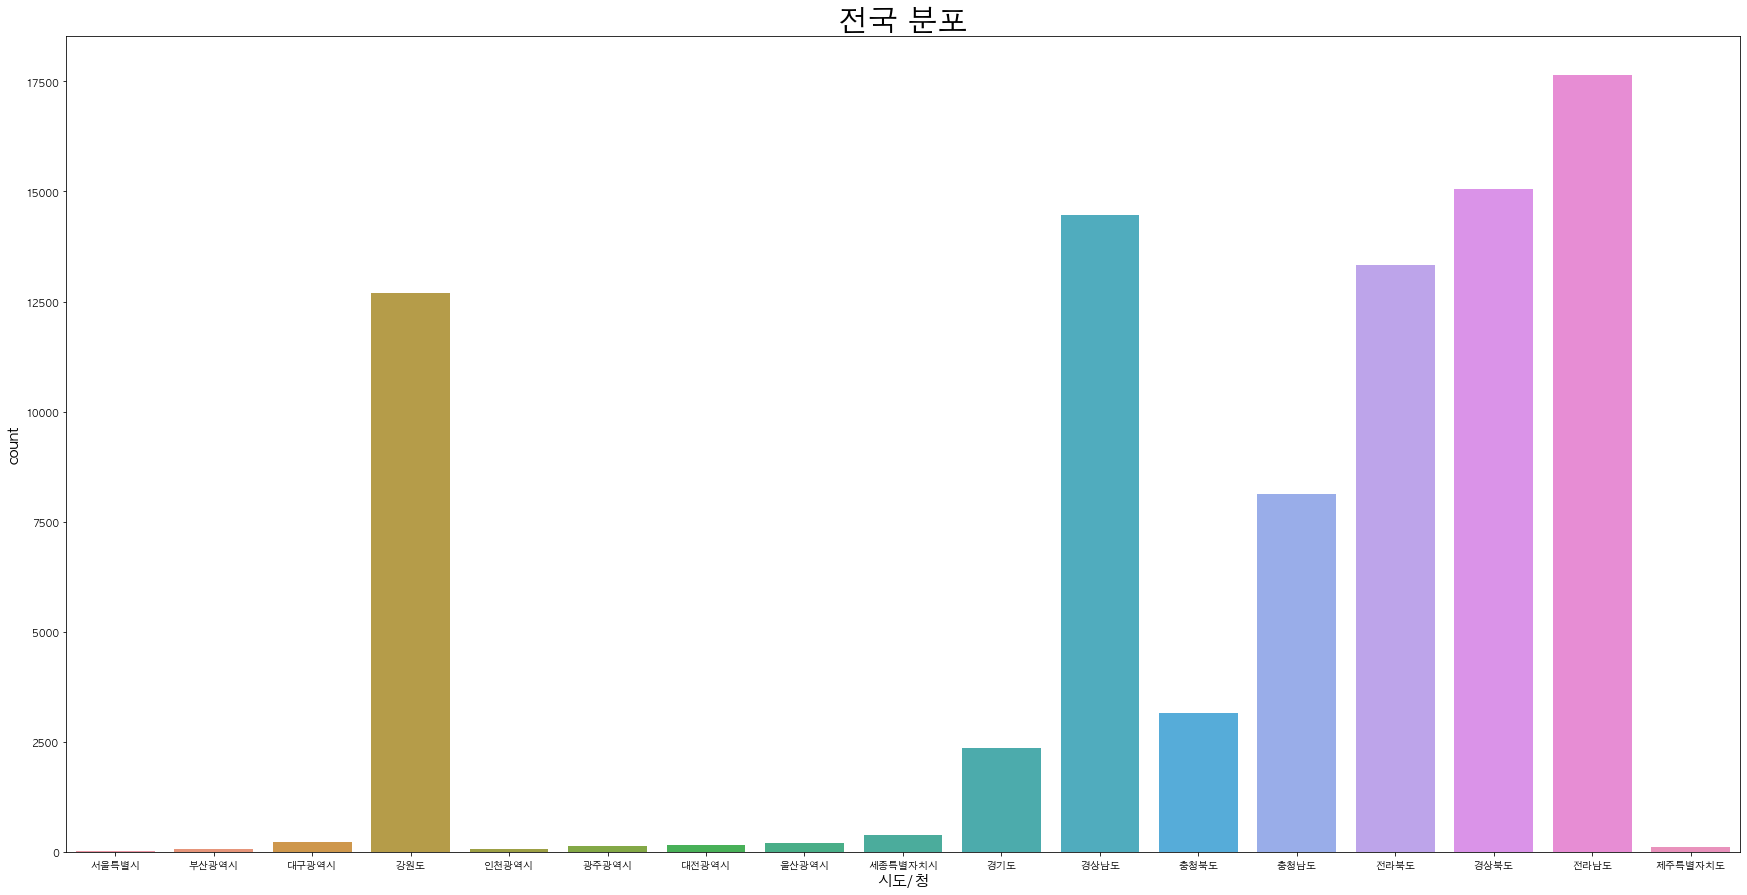

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="시도/청", data=data)
plt.title('전국 분포', fontsize=30)
plt.show()

### 재배채취

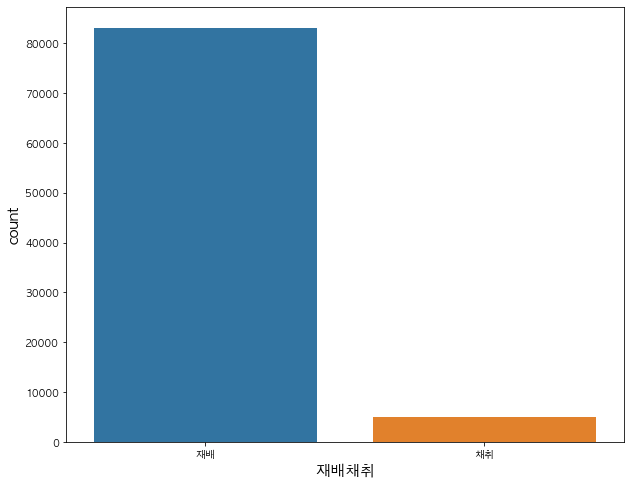

In [8]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배채취", data=data)
plt.show()

### 재배면적

In [9]:
data.replace({'재배면적': {0 : np.NaN}},
             inplace=True)
data.dropna(axis=0, inplace=True)

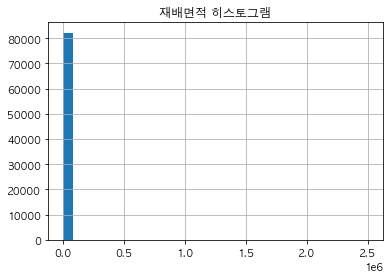

/Users/kimsunghun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kimsunghun/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


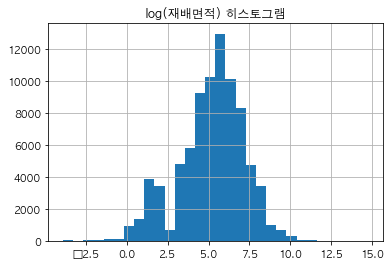

In [10]:
data['재배면적'].hist(bins=30)
plt.title('재배면적 히스토그램')
plt.show()

pd.Series(np.log(data['재배면적'].astype(float))).hist(bins=30)
plt.title('log(재배면적) 히스토그램')
plt.show()

In [11]:
data['재배면적'] = np.log(data['재배면적'].astype(float))
data.head()

,시도/청,재배채취,재배기준,재배면적,환산면적,품목 대분류,품목 중분류,품목 소분류,생산량
8,서울특별시,재배,산지,5.105945,0,산나물,산나물,두릅,20
19,서울특별시,재배,노지,7.090077,3966.94,조경재,조경수,기타관목류,20000
26,서울특별시,재배,시설,5.703782,991.736,조경재,야생화,야생화,4000
27,서울특별시,재배,시설,5.703782,991.736,조경재,야생화,야생화,1000
28,서울특별시,재배,노지,6.214608,1652.89,조경재,조경수,기타관목류,15000


### 환산면적

In [12]:
data.replace({'환산면적': {0 : np.NaN}},
             inplace=True)
data.dropna(axis=0, inplace=True)

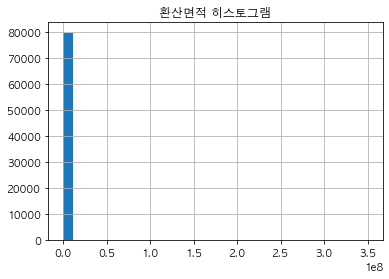

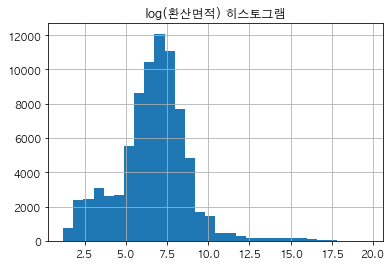

In [13]:
data['환산면적'].hist(bins=30)
plt.title('환산면적 히스토그램')
plt.show()

pd.Series(np.log(data['환산면적'].astype(float))).hist(bins=30)
plt.title('log(환산면적) 히스토그램')
plt.show()

In [14]:
data['환산면적'] = np.log(data['환산면적'].astype(float))
data.head()

,시도/청,재배채취,재배기준,재배면적,환산면적,품목 대분류,품목 중분류,품목 소분류,생산량
19,서울특별시,재배,노지,7.090077,8.285751,조경재,조경수,기타관목류,20000
26,서울특별시,재배,시설,5.703782,6.899456,조경재,야생화,야생화,4000
27,서울특별시,재배,시설,5.703782,6.899456,조경재,야생화,야생화,1000
28,서울특별시,재배,노지,6.214608,7.410282,조경재,조경수,기타관목류,15000
31,서울특별시,재배,시설,6.907755,8.103429,약용식물,약초,당귀,6000


### 품목 대분류

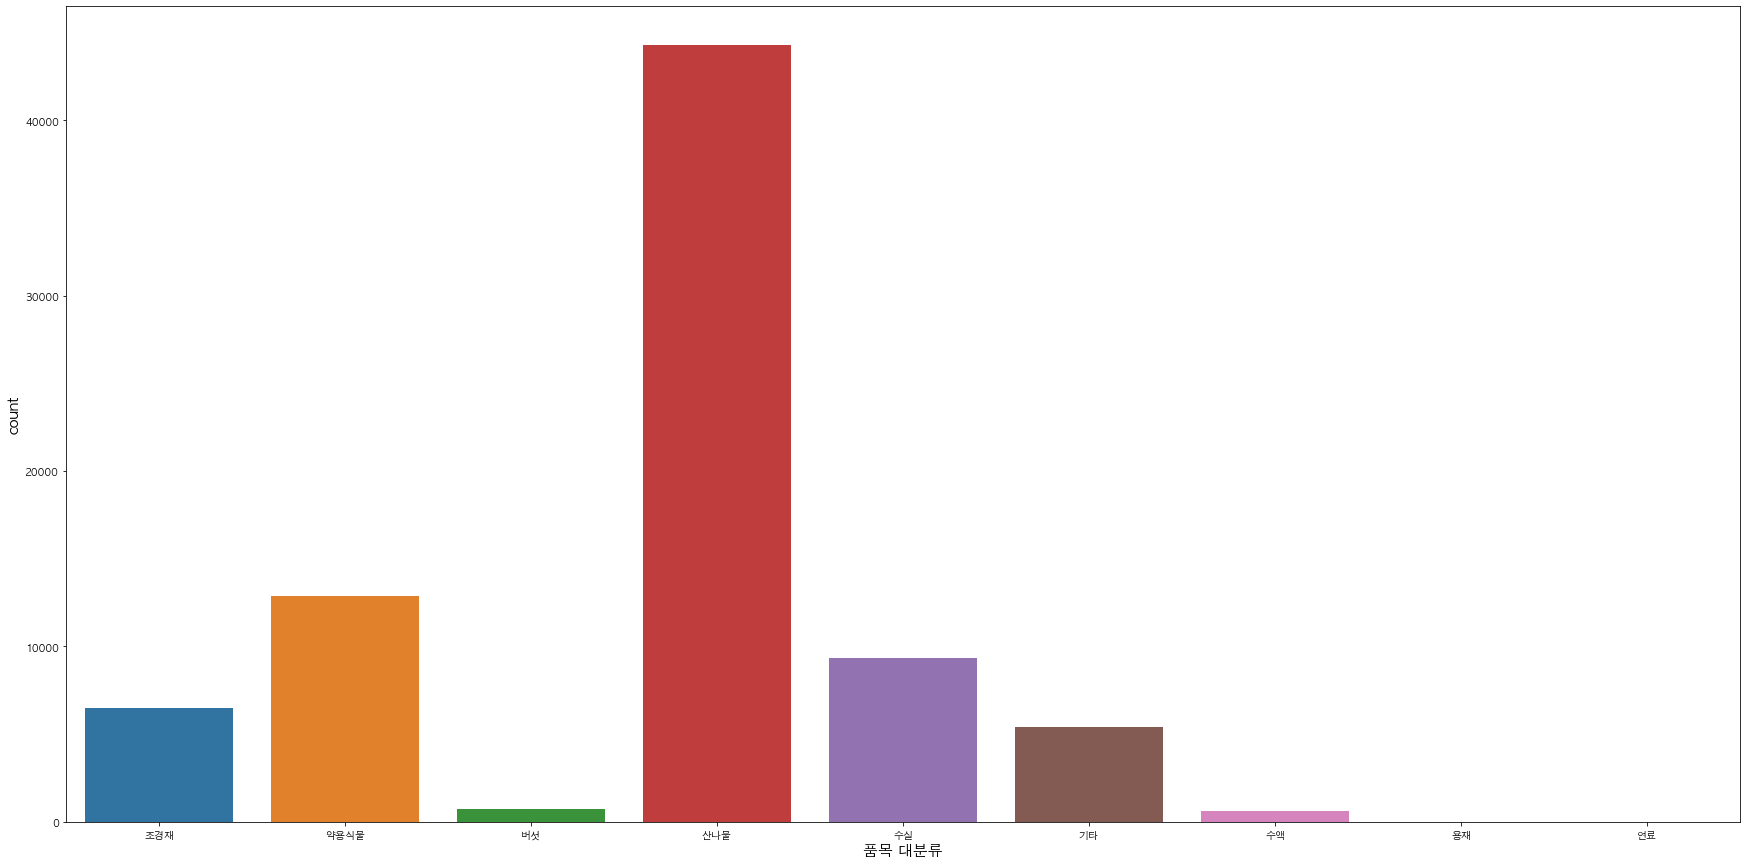

In [15]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 대분류", data=data)
plt.show()

### 품목 중분류

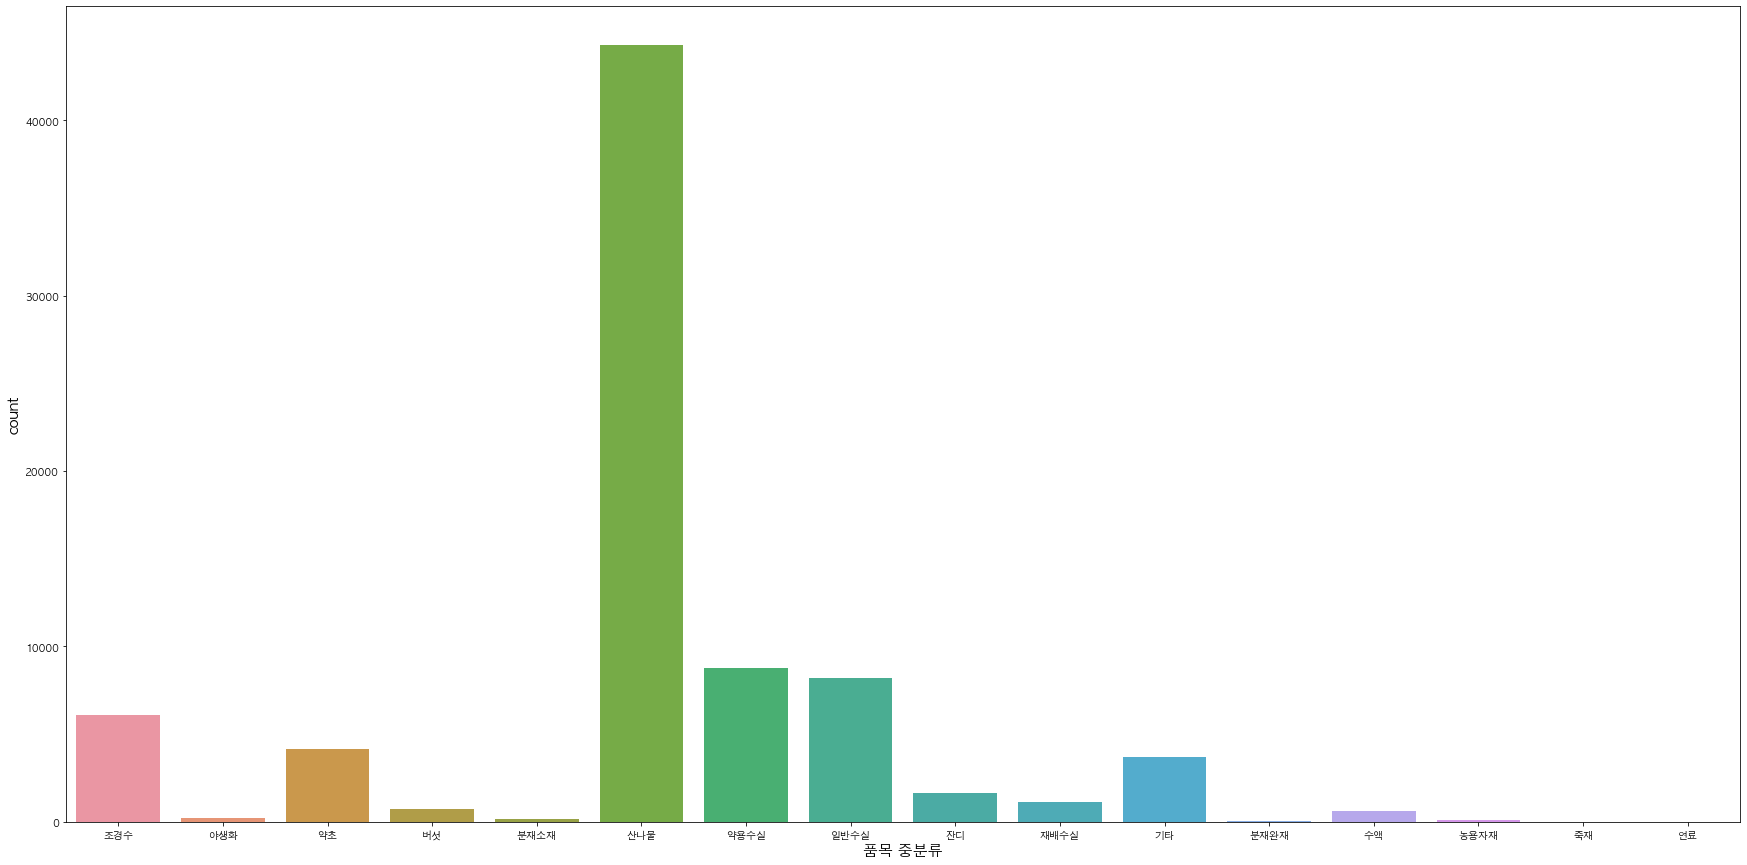

In [16]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 중분류", data=data)
plt.show()

### 품목 소분류

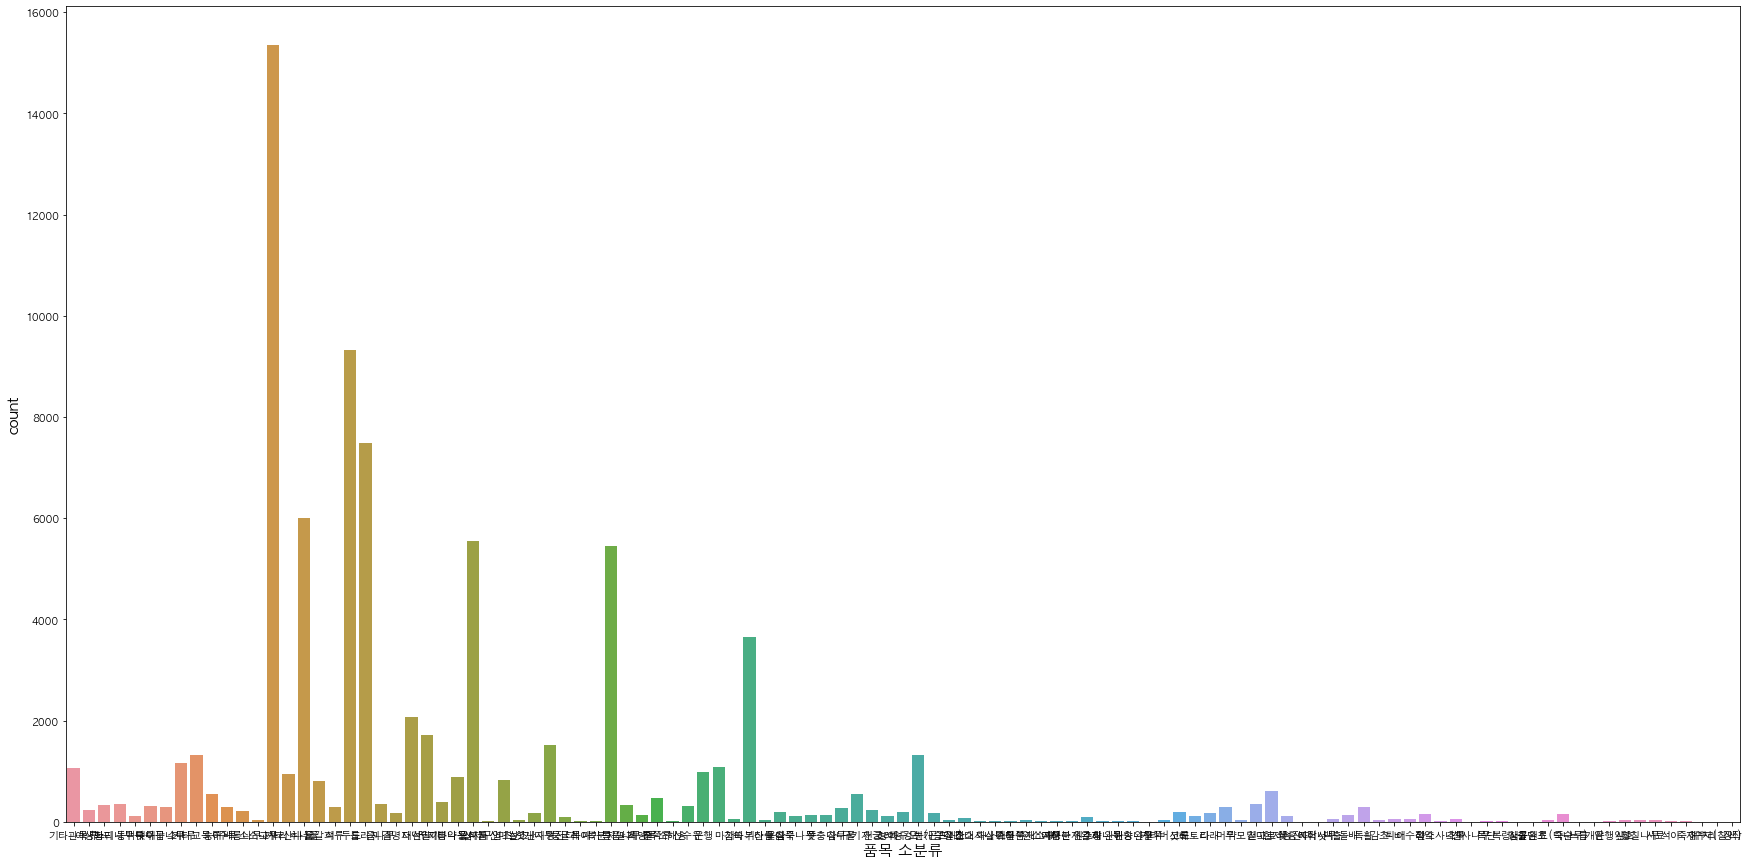

In [17]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 소분류", data=data)
plt.show()

### 생산량

In [18]:
data.replace({'생산량': {0 : np.NaN}},
             inplace=True)
data.dropna(axis=0, inplace=True)

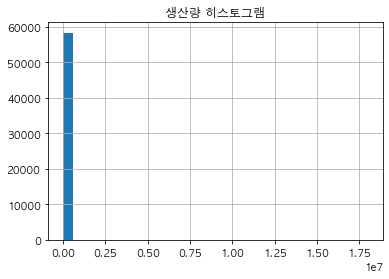

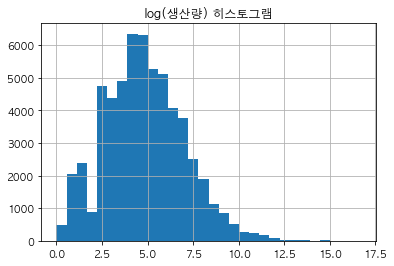

In [19]:
data['생산량'].hist(bins=30)
plt.title('생산량 히스토그램')
plt.show()

pd.Series(np.log(data['생산량'].astype(float))).hist(bins=30)
plt.title('log(생산량) 히스토그램')
plt.show()

## Numerical Variable processing

In [36]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
scaled = minmax_scaler.fit_transform(data.loc[:, ['재배면적', '환산면적', '생산량']])
scaled

array([[6.14304235e-01, 3.83708474e-01, 1.11105562e-03],
       [5.36900238e-01, 3.08683491e-01, 2.22166679e-04],
       [5.36900238e-01, 3.08683491e-01, 5.55000031e-05],
       ...,
       [2.41438729e-01, 4.56049414e-01, 4.61055581e-04],
       [5.54610729e-01, 7.59596066e-01, 4.59383359e-03],
       [1.12502475e-01, 3.31076018e-01, 6.99444483e-05]])

## Categorival variable processing

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal = ordinal_encoder.fit_transform(data.loc[:, ['시도/청' , '재배채취', '품목 대분류', '품목 중분류', '품목 소분류']])
ordinal_encoder.categories_

[array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
        '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
        '충청남도', '충청북도'], dtype=object),
 array(['재배', '채취'], dtype=object),
 array(['기타', '버섯', '산나물', '수실', '수액', '약용식물', '연료', '용재', '조경재'],
       dtype=object),
 array(['기타', '농용자재', '버섯', '분재소재', '분재완재', '산나물', '수액', '야생화', '약용수실',
        '약초', '연료', '일반수실', '잔디', '재배수실', '조경수', '죽재'], dtype=object),
 array(['감초', '개암', '결명자', '고려엉겅퀴(곤드레)', '고로쇠', '고비', '고사리', '골담초', '구기자',
        '구절초', '기타관목류', '기타교목류', '기타버섯류', '기타부산물', '기타분재소재', '기타분재완재',
        '기타산나물', '기타수실', '기타약용식물', '꽃송이버섯', '꾸지뽕나무', '난지형잔디', '눈개승마', '느릅',
        '느티나무류', '능이', '다래', '단풍나무류', '당귀', '더덕', '도라지', '도토리', '독활', '돌배',
        '동백나무', '두릅', '두충나무', '둥굴레', '마', '마가목', '머루', '목단', '목이', '배롱나무',
        '백출', '벚나무', '복령', '복분자딸기', '사료', '산딸기', '산마늘', '산사나무', '산수유',
        '산초', '삼지구엽초', '석류', '석이', '섬유원료(닥나무)', '소나무', '소소나무', '소소사나무',
        '소철쭉', '소해송', '소향나무',

In [21]:
ordinal

array([[ 8.,  0.,  8., 14., 10.],
       [ 8.,  0.,  8.,  7., 67.],
       [ 8.,  0.,  8.,  7., 67.],
       ...,
       [16.,  0.,  5.,  9., 38.],
       [16.,  0.,  5.,  8., 71.],
       [16.,  0.,  5.,  9., 85.]])

In [22]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot = onehot_encoder.fit_transform(ordinal)
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16.]), array([0., 1.]), array([0., 1., 2., 3., 4., 5., 6., 7., 8.]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108.])]
(58416, 153)


In [40]:
numeric_data_df = pd.DataFrame(scaled[:, 0:2], columns=['재배면적', '환산면적'])
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,재배면적,환산면적,0,1,2,3,4,5,6,7,...,143,144,145,146,147,148,149,150,151,152
0,0.614304,0.383708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.536900,0.308683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.536900,0.308683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.565422,0.336329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.604124,0.373841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58411,0.125701,0.343869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58412,0.200857,0.416715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58413,0.241439,0.456049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58414,0.554611,0.759596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
X_data = np.array(X_data_df)
y_data = np.array(scaled[:, 2])

print(X_data.shape, y_data.shape)

(58416, 155) (58416,)


## Train Test split

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(46732, 155) (11684, 155)


# Modeling

## RandomForest

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', random_state = 156)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=156)

In [46]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[1.75834938e-06 1.90789361e-05 3.34941924e-06 2.33752261e-05
 2.56379635e-05 3.84212321e-05 3.63809475e-06 1.33285636e-05
 6.11979065e-07 5.89675263e-05]


In [47]:
print(y_test[:10])

[2.72222237e-06 1.11111117e-06 1.45555564e-05 6.61111148e-06
 1.74444454e-05 4.66111137e-05 5.50000031e-06 2.77222238e-05
 1.66666676e-07 5.50000031e-06]


## Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [65]:
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_train, y_train))

[-1.33817142e-03  2.69120789e-03  1.12052611e+09  1.12052611e+09
  1.12052611e+09  1.12052611e+09  1.12052611e+09  1.12052611e+09
  1.12052611e+09  1.12052611e+09  1.12052611e+09  1.12052611e+09
  1.12052611e+09  1.12052611e+09  1.12052611e+09  1.12052611e+09
  1.12052611e+09  1.12052611e+09  1.12052611e+09  7.16135258e+08
  7.16135258e+08  1.09797639e+09 -2.94635812e+09 -3.07411901e+09
 -6.87409655e+08  3.19806773e+09  1.27557253e+09 -3.51972418e+09
  7.38625557e+08 -5.24829612e+08  8.80916648e+09 -1.49730862e+09
  5.58124812e+09  4.47392635e+09  3.74548664e+08  6.67940440e+09
  5.90541569e+07 -1.05377624e+09  7.75236297e+08  6.91570166e+08
 -3.68013729e+08  2.65695536e+09 -5.66275289e+09 -3.13342294e+08
 -3.13379696e+08  1.70090607e+09  1.16701662e+09  1.16461361e+09
  1.16701662e+09 -4.71126076e+08 -1.22962576e+08 -4.71126076e+08
 -4.71126076e+08  1.08335049e+09  1.08335049e+09  1.16701662e+09
  3.97236862e+09  3.97236862e+09  4.99269310e+08 -6.77298355e+09
 -8.14937425e+08  3.28444

In [62]:
reg_pred = reg.predict(X_test)
print(reg_pred[:10])

[-8.39233398e-05  1.43051147e-05  6.38961792e-05  9.25064087e-05
  1.62124634e-05  7.66754150e-04 -1.56402588e-04 -5.81741333e-05
 -1.60217285e-04 -6.48498535e-05]


In [66]:
print(y_test[:10])

[2.72222237e-06 1.11111117e-06 1.45555564e-05 6.61111148e-06
 1.74444454e-05 4.66111137e-05 5.50000031e-06 2.77222238e-05
 1.66666676e-07 5.50000031e-06]


## XGBoost

In [69]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

[1.9070270e-05 2.7473601e-05 1.9070270e-05 4.0534964e-05 3.6694953e-05
 1.5167026e-04 1.9070270e-05 2.7473601e-05 1.9070270e-05 1.4783572e-04]


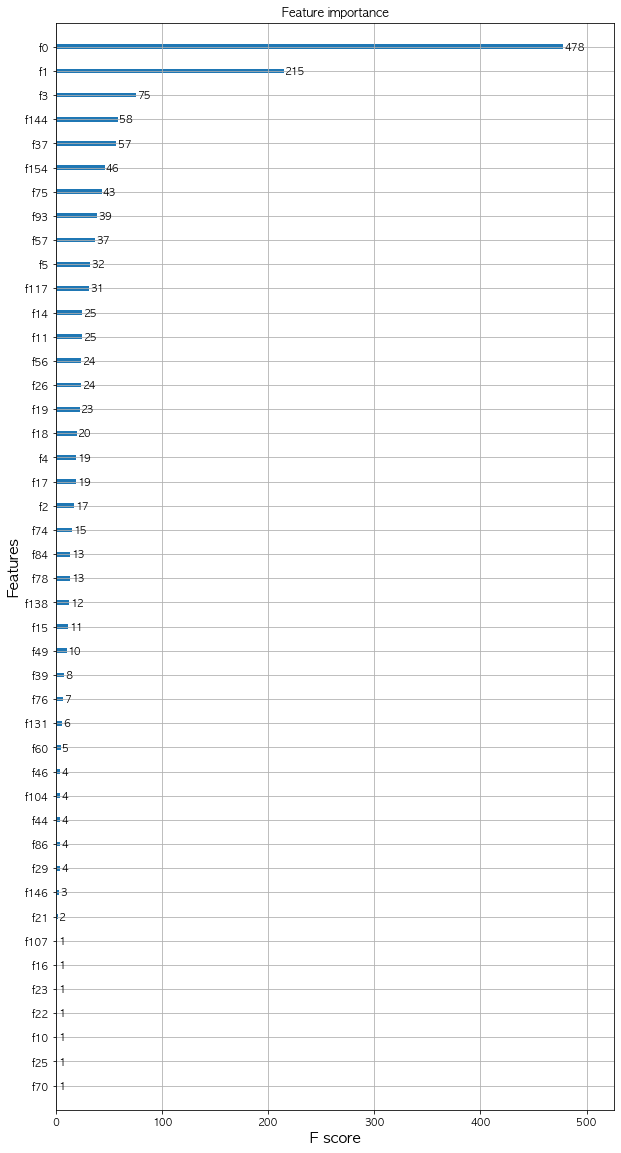

In [77]:
from xgboost import plot_importance

plot_importance(xgb_reg)

fig = plt.gcf()
fig.set_size_inches(10, 20)